# Creating Figure 4.7a for Thesis

In [1]:
%load_ext autoreload
%autoreload 2
import os.path as op
import tempfile

import matplotlib.pyplot as plt


import hnn_core
from hnn_core import simulate_dipole, jones_2009_model
from hnn_core.viz import plot_dipole


import sys
sys.path.append('../code/')
sys.path.append('../code/utils/')


import numpy as np
import torch

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt


import os

work_dir = '/home/ubuntu/sbi_for_eeg_data/code/'

os.chdir(work_dir)

import utils.sbi_modulated_functions

# sbi
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi

from sbi.analysis import conditional_pairplot, conditional_corrcoeff



# import the summary statistics that you want to investigate
from summary_features.calculate_summary_features import calculate_summary_statistics_alternative as alternative_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal as temporal_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_number as number_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal


In [2]:
print(torch.__version__)

1.11.0


In [3]:
## defining neuronal network model

num_params = 17

from utils.simulation_wrapper import set_network_default, SimulationWrapper
sim_wrapper = SimulationWrapper(num_params, noise=False)


In [4]:
window_len = 30

    
prior_min = [0, 0, 0, 0, 0, 13.3,  0, 0, 0, 0, 0, 51.980, 0, 0, 0, 0, 112.13]
prior_max = [0.927, 0.160, 2.093, 1.0, 1.0, 35.9, 0.000042, 0.039372, 0.025902,  0.480, 0.117, 75.08, 8.633, 4.104, 1.0, 1.0, 162.110]

true_params = torch.tensor([[0.277, 0.0399, 0.6244, 0.3739, 0.0, 18.977, 0.000012, 0.0115, 0.0134,  0.0767, 0.06337, 63.08, 4.6729, 2.33, 0.016733, 0.0679, 120.86]])


prior = utils.torchutils.BoxUniform(low=prior_min, high=prior_max)

#number_simulations = 10
density_estimator = 'nsf'


In [5]:

from utils import inference

In [6]:
from utils import inference

import pickle
from data_load_writer import *
from data_load_writer import load_from_file as lf

import os

work_dir = '/home/ubuntu/'

os.chdir(work_dir)

file = '10000sims_17params_11_04_nsf_fake_ratio'


os.chdir('results')


posterior = torch.load('{}/posterior.pt'.format(file))

obs_real = torch.load('{}/obs_real.pt'.format(file))

In [7]:
#posterior = posteriors_round[1]

In [8]:
#obs_real_stat2 = calculate_summary_stats_temporal(obs_real[0])

samples = posterior.sample((100,))

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

acceptance rate:  1.0


/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/nflows/transforms/lu.py:81: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755861072/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:1672.)
  outputs.t(), lower, upper=False, unitriangular=True


In [9]:
parameter_names = ["prox1_ampa_l2_bas","prox1_ampa_l2_pyr","prox1_ampa_l5_bas","prox1_nmda_l5_bas", "prox1_nmda_l5_pyr",
 "t_prox1",
 "dist_ampa_l2_pyr","dist_ampa_l2_bas","dist_nmda_l2_pyr",
 "dist_nmda_l5_pyr","dist_nmda_l2_bas",
 "t_dist", 
 "prox2_ampa_l2_pyr","prox2_ampa_l5_pyr","prox2_nmda_l2_pyr","prox2_nmda_l5_pyr",
 "t_prox2"]

if num_params ==6:
    parameter_names = ["prox_1_ampa_l2_pyr",
     "t_evprox_1",
     "dist_nmda_l2_pyr",
     "t_evdist_1", 
     "prox_2_ampa_l5_pyr",
     "t_evprox_2"]

In [10]:
s_x = inference.run_only_sim(samples, simulation_wrapper=sim_wrapper, num_workers=8)

param size param size 17param size
early stop17 17param size
early stop 200.0
param size param size param size17

  17
17early stop
early stopparam sizeearly stop  param size200.0  
200.017
 param size  200.0param size 200.017 
17param size 

  
17early stop
early stop  17200.0200.0
param size  17

param size  
 param size 17
 early stop
 1717

200.0
param size  17
num_paramsnum_params  17num_params
num_params 17 17
joblib will run over 1 jobs17

num_params
 joblib will run over 1 jobsjoblib will run over 1 jobs

num_params17joblib will run over 1 jobs
num_params 17
 17

joblib will run over 1 jobsjoblib will run over 1 jobs
[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.

num_paramsjoblib will run over 1 jobs 
17
joblib will run over 1 jobs
Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_

Simulation time: 190.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 190.0 ms...
[Done]
running trial 1 on 1 cores
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 13.8810266  13.83475337
 13.78848464]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:  1.7min
obs [-0.59638303 -0.59701994 -0.59762624 ...  8.88776024  8.8588115
  8.8298731 ]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:  1.7min
Building the NEURON model
obs [-0.59760178 -0.59840714 -0.59920666 ... 11.87922905 11.83715425
 11.79511439]
param size 17
early stop 200.0
param size Building the NEURON model
 17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done   8 tasks      

Simulation time: 20.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 30.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 40.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 60.0 ms...
Simulation time: 10.0 ms...
Simulation time: 60.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 50.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 70.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 70.0 ms...
Simulation time: 30.0 ms

Simulation time: 70.0 ms...
Simulation time: 90.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...Simulation time: 40.0 ms...

Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 100.0 ms...
Simulation time: 80.0 ms...
Simulation time: 100.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 90.0 ms...
Simulation time: 110.0 ms...
Simulation time: 60.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 120.0 ms...
Simulation time: 70.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...Simulation time: 110.0 ms...

Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 120.0 ms...
Simulati

Simulation time: 70.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 90.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 110.0 ms...
Simulation time: 150.0 ms...
Simulation time: 80.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 100.0 ms...
Simulation time: 140.0 ms...
Simulation time: 160.0 ms...
Simulation time: 120.0 ms...
Simulation time: 160.0 ms...
Simulation time: 110.0 ms...
Simulation time: 160.0 ms...
Simulation time: 90.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 170.0 ms...
Simulation time: 100.0 ms...
Simulation time: 180.0 ms...
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 1

Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 120.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 190.0 ms...
Simulation time: 180.0 ms...
Simulation time: 170.0 ms...
Simulation time: 190.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 130.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 190.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 10.07388591 10.04044104
 10.00701703]
param size 17
early stop 200.0
param size  17
[Parallel(n_jobs=8)]: Done  42 tasks      | elapsed: 14.6min
num_params 17
joblib will run over 1 jobs
Simulation time: 180.0 ms...
Building the NEURON model
obs [-0.59760178 -0.59840714 -0.59920666 ... 11.65461665 11.61782772
 11.5810498 ]
param size 17
early stop 200.0
param size  17
Simulation time: 10.0 ms...
[Parallel(n_jobs=8)]: Done  43 tasks      | elapsed: 14.7min
num_params 17
joblib will run over 1 jobs
Simulation tim

num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed: 16.8min
Building the NEURON model
Simulation time: 20.0 ms...
Simulation time: 180.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 14.0180619  13.9717842
 13.92552205]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  53 tasks      | elapsed: 16.9min
Simulation time: 160.0 ms...
Building the NEURON model
Simulation time: 170.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 30.0 ms...
Simulation time: 10.0 ms...
Simulation time: 190.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 10.0 ms...
Simulation time: 40.0 ms...
Simulation time: 20.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 13.42128529 13.37623637
 13.33120577]
par

Building the NEURON model
Simulation time: 60.0 ms...
Simulation time: 30.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 12.92974685 12.88848375
 12.84724074]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  63 tasks      | elapsed: 18.8min
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 30.0 ms...
Building the NEURON model
Simulation time: 10.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ...  9.9767136   9.94428166
  9.91186214]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed: 18.8min
Simulation time: 40.0 ms...
Building the NEURON model
Simulation time: 70.0 ms...
Simulation time: 10.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 20.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 60.0 ms...
Simulation time: 80.0 ms..

Simulation time: 60.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 40.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 30.0 ms...
Simulation time: 70.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 50.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 40.0 ms...
Simulation time: 80.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 60.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 50.0 ms...
Simulation time: 90.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 70.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 100.0 ms...
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation t

Simulation time: 150.0 ms...
Simulation time: 70.0 ms...
Simulation time: 120.0 ms...
Simulation time: 90.0 ms...
Simulation time: 70.0 ms...
Simulation time: 150.0 ms...
Simulation time: 80.0 ms...
Simulation time: 70.0 ms...
Simulation time: 160.0 ms...
Simulation time: 80.0 ms...
Simulation time: 130.0 ms...
Simulation time: 100.0 ms...
Simulation time: 80.0 ms...
Simulation time: 160.0 ms...
Simulation time: 90.0 ms...
Simulation time: 170.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 140.0 ms...
Simulation time: 110.0 ms...
Simulation time: 90.0 ms...
Simulation time: 170.0 ms...
Simulation time: 100.0 ms...
Simulation time: 180.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 150.0 ms...
Simulation time: 120.0 ms...
Simulation time: 100.0 ms...
Simulation time: 180.0 ms...
Simulation time: 110.0 ms...
Simulation time: 190.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 160.0 ms.

Simulation time: 190.0 ms...
Simulation time: 160.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 110.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 15.76704276 15.71517998
 15.66335345]
param size 17
early stop 200.0
param size  17
Simulation time: 130.0 ms...
num_params 17
joblib will run over 1 jobs
Simulation time: 120.0 ms...
Simulation time: 170.0 ms...
Building the NEURON model
Simulation time: 150.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 140.0 ms...
Simulation time: 120.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 180.0 ms...
Simulation time: 160.0 ms...
Simulation time: 10.0 ms...
Simulation time: 150.0 ms...
Simulation time: 130.0 ms...
Simulation time: 150.0 ms...
Simulation time: 190.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 140.0 ms...
Simulation ti

In [11]:
### sample from prior now
num_samples = 100
samples_prior = []


for i in range(num_samples):
    sample = prior.sample()
    samples_prior.append(sample)
    

In [12]:
    
s_x_prior = inference.run_only_sim(samples_prior, sim_wrapper, num_workers=8)

param size 17
param sizeparam sizeearly stopparam size   param size param size1717 
param size
param size17early stopearly stop17   

200.0 17early stop17200.0early stop
  

early stopparam size 200.0200.0
 
 
param size param size 200.0early stop param size   171717

 
200.017param size 


  1717
early stop 200.0
param size param size  17

200.0
 17param size 
 17
num_paramsnum_params num_params 17
17num_paramsnum_params 17
 
17
 17num_paramsjoblib will run over 1 jobsnum_params joblib will run over 1 jobs

17joblib will run over 1 jobs 


joblib will run over 1 jobs17

joblib will run over 1 jobsjoblib will run over 1 jobs

num_params joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.
17
joblib will run over 1 jobs
Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/hnn_core/mod/x86_64/.libs/libnrnmech.soLoading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_e

early stop  200.017

param size  17
num_params 17
joblib will run over 1 jobs
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:  1.6min
Building the NEURON model
Building the NEURON model
Building the NEURON model
obs [-0.4032086  -0.40011608 -0.39694932 ... 33.49432288 33.39104685
 33.28791532]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:  1.6min
obs [ 0.12475289  0.13228927  0.14002128 ... 59.05145    58.83912725
 58.62697307]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:  1.7min
Building the NEURON model
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
[Done]
runni

Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 40.0 ms...
Simulation time: 10.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 20.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 10.0 ms...
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 50.0 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 60.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 70.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulati

Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 110.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 120.0 ms...
Simulation time: 80.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 70.0 ms...
Simulation time: 130.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 100.0 ms...
Simulation time: 140.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation ti

Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 160.0 ms...
Simulation time: 140.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 150.0 ms...
Simulation time: 110.0 ms...
Simulation time: 170.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 150.0 ms...
Simulation time: 140.0 ms...
Simulation time: 160.0 ms...
Simulation time: 180.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 160.0 ms...
Simulation time: 150.0 ms...
Simulation time: 170.0 ms...
Simulation time: 190.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 150.0 ms...
Simulation time: 170.0 ms...
Simulation tim

Building the NEURON model
Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
Simulation time: 120.0 ms...
Simulation time: 140.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 24.60424647 24.5258985
 24.447572  ]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  42 tasks      | elapsed:  9.6min
Simulation time: 150.0 ms...
Building the NEURON model
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
Simulation time: 150.0 ms...
Simulation time: 130.0 ms...
Simulation time: 160.0 ms...
Simulation time: 190.0 ms...
Simulation time: 190.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 190.0 ms...
Simulation time: 160.0 ms...
Simulation time: 140.0 ms...
Simulation time: 170.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 62.63954477 62.43365577
 62.22783178]
param size 17
ear

Simulation time: 190.0 ms...
Building the NEURON model
Simulation time: 140.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
obs [ 0.5602235   0.5767832   0.59376583 ... 44.55366838 44.41454607
 44.27545715]
param size 17
early stop[Done] 200.0
running trial 1 on 1 cores

param size  17
Simulation time: 0.03 ms...
Simulation time: 180.0 ms...
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  53 tasks      | elapsed: 11.5min
Simulation time: 190.0 ms...
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 10.0 ms...
Simulation time: 0.03 ms...
Simulation time: 150.0 ms...
Simulation time: 10.0 ms...
Simulation time: 190.0 ms...
obs [-0.58025726 -0.57979807 -0.57923417 ... 26.64165916 26.54749107
 26.45341547]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  54 tasks      | elapsed: 11.6min
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
[Done]
runni

running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 30.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 170.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 40.0 ms...
Simulation time: 10.0 ms...
Simulation time: 40.0 ms...
Simulation time: 10.0 ms...
Simulation time: 180.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 50.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 50.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 190.0 ms...
Simulation time: 10.0 ms...
Simulation time: 60.0 ms...
Simulation time: 20.0 ms...
Simulation time: 60.0 ms...
Simulation time: 10.0 ms...
Simulation time: 30.0 ms...
obs [-0.59664596 -0.59734221 -0.5980204  ... 40.09155031 39.96894101
 39.84640807]
param size 17
early stop 200.0
param size  17
num_params 17
Simulation time: 30

Simulation time: 90.0 ms...
Simulation time: 30.0 ms...
Simulation time: 70.0 ms...
Simulation time: 30.0 ms...
Simulation time: 90.0 ms...
Simulation time: 10.0 ms...
Simulation time: 30.0 ms...
Simulation time: 100.0 ms...
Simulation time: 40.0 ms...
Simulation time: 80.0 ms...
Simulation time: 40.0 ms...
Simulation time: 100.0 ms...
Simulation time: 20.0 ms...
[Done]
running trial 1 on 1 coresSimulation time: 110.0 ms...

Simulation time: 0.03 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 90.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 50.0 ms...
Simulation time: 30.0 ms...
Simulation time: 60.0 ms...
Simulation time: 10.0 ms...
Simulation time: 50.0 ms...
Simulation time: 100.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 70.0 ms...
Simulation time: 60.0 ms...
Simulation time: 20.0 ms...
Simulation time: 60.0 ms...
Simulation time: 40.0 ms...
Simulation time: 110.0 ms...
Simul

Simulation time: 120.0 ms...
Simulation time: 60.0 ms...
Simulation time: 80.0 ms...
Simulation time: 170.0 ms...
Simulation time: 80.0 ms...
Simulation time: 110.0 ms...
Simulation time: 130.0 ms...
Simulation time: 40.0 ms...
Simulation time: 70.0 ms...
Simulation time: 130.0 ms...
Simulation time: 180.0 ms...
Simulation time: 90.0 ms...
Simulation time: 120.0 ms...
Simulation time: 90.0 ms...
Simulation time: 140.0 ms...
Simulation time: 50.0 ms...
Simulation time: 80.0 ms...
Simulation time: 190.0 ms...
Simulation time: 100.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 100.0 ms...
Simulation time: 60.0 ms...
Simulation time: 150.0 ms...
Simulation time: 90.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 13.10193182 13.05885152
 13.01579537]
param size 17
early stop 200.0
param size  17
num_params 17
[Parallel(n_jobs=8)]: Done  81 tasks      | elapsed: 17.8min
joblib will run over 1 jobs
Simulation time: 110.0 ms...
Simulation time: 140.0 ms

Simulation time: 10.0 ms...
Simulation time: 150.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 160.0 ms...
Simulation time: 90.0 ms...
Simulation time: 120.0 ms...
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
Simulation time: 20.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 170.0 ms...
Simulation time: 100.0 ms...
Simulation time: 130.0 ms...
Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 30.0 ms...
Simulation time: 180.0 ms...
Simulation time: 110.0 ms...
Simulation time: 140.0 ms...
Simulation time: 180.0 ms...
Simulation time: 150.0 ms...
Simulation time: 180.0 ms...
Simulation time: 160.0 ms...
Simulation time: 40.0 ms...
Simulation time: 150.0 ms...
Simulation time: 120.0 ms...
Simulation time: 190.0 ms...
Simulation time: 160.0 ms...
Simulation time: 190.0 ms...
Simulation time: 170.0 ms...
Simulation time: 19

In [13]:
s_x_torch = torch.stack(([s_x[i] for i in range(39)]))
s_x_prior_torch = torch.stack(([s_x_prior[i] for i in range(39)]))


mean = torch.mean(s_x_torch, 0)
std = torch.std(s_x_torch, 0)

mean_prior = torch.mean(s_x_prior_torch, 0)
std_prior = torch.std(s_x_prior_torch, 0)

lower = mean - 1.96 * std


upper = mean + 1.96 * std


lower_prior = mean_prior - 1.96 * std_prior


upper_prior = mean_prior + 1.96 * std_prior



In [14]:
obs_real = torch.load('{}/obs_real.pt'.format(file))

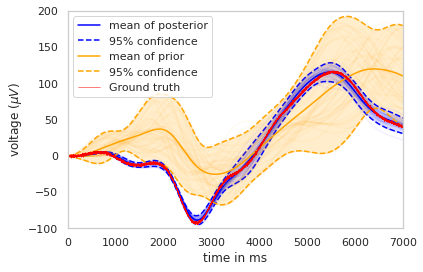

In [15]:
import seaborn as sns

sns.set() 

sns.set_style("whitegrid", {'axes.grid' : False})
#sns.set_style('ticks')

fig1, ax = plt.subplots(1, 1)
#ax.set_title("Comparing signal")

    
plt.plot(mean, color ='blue', label='mean of posterior')

for s in s_x[0:40]:
    plt.plot(s, alpha=0.05, color='blue')
    #plt.ylim(-30,30)
    plt.xlim(0, 7000)

plt.plot(lower, color='blue', linestyle='dashed', label='95% confidence')
plt.plot(upper, color='blue', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower, y2=upper, color='blue', alpha=0.1)
plt.xlim(0, 7000)
plt.ylim(-100, 200)


plt.plot(mean_prior, color ='orange', label='mean of prior')


for x_w in s_x_prior[0:40]:
    plt.plot(x_w, alpha=0.05, color='orange')

plt.plot(lower_prior, color='orange', linestyle='dashed', label='95% confidence')
plt.plot(upper_prior, color='orange', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower_prior, y2=upper_prior, color='orange', alpha=0.2)
plt.xlim(0, 7000)

plt.xlabel('time in ms')
#plt.ylabel('voltage ()')

fig1.gca().set_ylabel(r'voltage ($\mu V$)')
    
plt.plot(obs_real, label='Ground truth', color='red', linewidth=0.5)



plt.legend()

In [16]:
plt.savefig('thesis_4_7a.png')

<Figure size 432x288 with 0 Axes>